### Running Haplarithmisis
This notebook is to implement the Haplarithmisis scripts.

#### 1. MetaInfo 
We have provided a sample config file in the repo, more details see: [config.txt](https://github.com/CellularGenomicMedicine/WGSPGT/blob/main/Haplarithmisis/PGT_config_PGD9999.txt), [samplesheet.csv](https://github.com/CellularGenomicMedicine/WGSPGT/blob/main/Haplarithmisis/ExampleSamplesheet.csv).

In [1]:
# load library
import re
import glob
from subprocess import run
from IPython.display import Image, display

# define the command and arguments
load_module= "module load singularity/3.6.3"
run_simg = "singularity exec hapRv4.sif Rscript"
script_path = "/home/ping.cao/CGM/Haplarithmisis/analyses"
config_file = "/home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/PGT_config_PGD4261.txt"
err_file = "error.err"

In [2]:
goal = "MetaInfo"
r_script = f"{script_path}/{goal}/{goal}.R"
cmd1 = f"{load_module} && {run_simg} {r_script} {config_file} {goal}_{err_file}"

result = run(cmd1, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)

[1] "Potential errors written to: MetaInfo_error.err"
AF/UM/AGF/UGM has been tested 



#### 2. ConvertGenotype



In [3]:
goal = "ConvertGenotype"
r_script = f"{script_path}/{goal}/{goal}.R"
cmd2 = f"{load_module} && {run_simg} {r_script} {config_file} {goal}_{err_file}"

result = run(cmd2, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)

[1] "Potential errors written to: ConvertGenotype_error.err"
[1] "Started reading vcfR for Crd and Alleles"
[1] "Determine SNP coverage"
[1] "Started reading Vcf for GT"
[1] "Started calculating BAF"
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/ConvertGenotype/Father_4261_embryo-4_run2_PGD4261_GT.txt..."
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/ConvertGenotype/Father_4261_embryo-7_run2_PGD4261_GT.txt..."
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/ConvertGenotype/Father_4261_embryo-21_run2_PGD4261_GT.txt..."
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/ConvertGenotype/Father_4261_embryo-4_run2_PGD4261_BAF.txt..."
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/ConvertGenotype/Father_4261_embryo-7_run2_PGD4261_BAF.txt..."
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/ConvertGenotype/Fa

#### 3. QDNASeq



In [17]:
goal = "QDNASeq"
r_script = f"{script_path}/{goal}/{goal}.R"
cmd3 = f"{load_module} && {run_simg} {r_script} {config_file} {goal}_{err_file}"

result = run(cmd3, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)

[1] "Potential errors written to: QDNASeq_error.err"
[1] TRUE
[1] "Started calculating LogR"
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/QDNASeq/Father_4261_embryo-4_run2_PGD4261_LogR.txt..."
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/QDNASeq/Father_4261_embryo-7_run2_PGD4261_LogR.txt..."
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/QDNASeq/Father_4261_embryo-21_run2_PGD4261_LogR.txt..."
[1] "Started calculating SegLogR for gamma 50"
[1] "PCF segmentation is applying..."
[1] "DNA17-62323_run2 ==> gamma 50 is applied"
[1] "DNA17-62325_run2 ==> gamma 50 is applied"
[1] "DNA18-53605_run2 ==> gamma 50 is applied"
[1] "DNA18-54450_run2 ==> gamma 50 is applied"
[1] "4261_embryo-4_run2 ==> gamma 50 is applied"
[1] "4261_embryo-7_run2 ==> gamma 50 is applied"
[1] "4261_embryo-21_run2 ==> gamma 50 is applied"
[1] "Writing data to /home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/QDNA

#### 4. NucBedPrep 
Run this step when embryo sequencing information is present. NucBedPrep generates a file containing Chr, Position and Names (format: "chrX:Position") from the family vcf file that will be used for subsequent step PGT Wave Correction.

In [18]:
goal = "NucBedPrep"
r_script = f"{script_path}/{goal}/{goal}.R"
cmd4 = f"{load_module} && {run_simg} {r_script} {config_file} {goal}_{err_file}"

result = run(cmd4, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)


Read 27.2% of 5582877 rows
Read 41.4% of 5582877 rows
Read 52.8% of 5582877 rows
Read 65.0% of 5582877 rows
Read 79.7% of 5582877 rows
Read 97.1% of 5582877 rows
Read 5582877 rows and 3 (of 3) columns from 0.136 GB file in 00:00:13



#### 5. PGT Wave correction 

**input**: <br>
`sampledir`: the ConvertGenotype dir <br>
`refdir`: the reference dir <br>
`output_file_name`: family number <br>
`windowsize`: gtypemodulator_window from the config file <br>

**output**: <br>
a *.txt* file containing GC content for each position with average of 10000 bp bins. The CG content file could be used for GC correction in downstream steps.

In [24]:
goal="WaveCorrection"
toload="module load bioinf/bedtools/2.17.0"
sampledir="/home/ping.cao/CGM/testfamily/PGD4261/D21_14848-HMN5A_PGD/ConvertGenotype"
refdir="/ifs/data/lib/genomes/human/bwa-mem2"
windowsize=10000
bashrun=f"nucBed -bed {sampledir}/Window10000.bed -fi {refdir}/GRCh38_pgt/GCA_000001405.15_GRCh38_full_plus_hs38d1_analysis_set.pgt.fna > {sampledir}/{windowsize}_GCcontent.txt"

cmd5 = f"{toload} && {bashrun}"

result = run(['/bin/bash', '-c', cmd5], capture_output=True, text=True)

# print out result
print(result.stdout)

#### 6. Haplarithmisis
**input**: <br>
`config_file_fam`: config file from family<br>
`EmbryoID`: embryoID<br>
`Gamma_value`: gamma value<br>
`errorFilePath`: error path<br>

In [25]:
goal = "Haplarithmisis"
r_script = f"{script_path}/{goal}/{goal}.R"
arg0 = "4261_embryo-21_run2"
arg1 = "10"

cmd6 = f"{load_module} && {run_simg} {r_script} {config_file} {arg0} {arg1} {goal}_{err_file}"

result = run(cmd6, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)

[1] "Potential errors written to: Haplarithmisis_error.err"

Read 10.6% of 5582876 rows
Read 30.1% of 5582876 rows
Read 35.5% of 5582876 rows
Read 45.3% of 5582876 rows
Read 62.9% of 5582876 rows
Read 74.7% of 5582876 rows
Read 84.0% of 5582876 rows
Read 5582876 rows and 13 (of 13) columns from 0.373 GB file in 00:00:11
[1] "Loading parameters and intervals..."

Read 3.0% of 5582877 rows
Read 21.7% of 5582877 rows
Read 38.9% of 5582877 rows
Read 42.8% of 5582877 rows
Read 64.7% of 5582877 rows
Read 76.1% of 5582877 rows
Read 97.1% of 5582877 rows
Read 5582877 rows and 9 (of 9) columns from 0.311 GB file in 00:00:17

Read 0.0% of 5582877 rows
Read 24.0% of 5582877 rows
Read 46.8% of 5582877 rows
Read 69.7% of 5582877 rows
Read 93.7% of 5582877 rows
Read 97.1% of 5582877 rows
Read 5582877 rows and 8 (of 8) columns from 0.301 GB file in 00:00:11
[1] "Chr-specific QC analysis for family"
[1] "#1 ==> Call-rate computation..."
[1] "DNA17-62323_run2"
[1] "DNA17-62325_run2"
[1] "DNA18-53605_ru

#### 7. EmbryoTestReportData
**input**: <br>
`config_file_fam`: config file from family<br>
`dbsnp_path`: dbsnp path<br>
`EmbryoID`: embryoID<br>
`Gamma_value`: gamma value<br>
`errorFilePath`: error path<br>

In [26]:
goal = "EmbryoTestReportData"
r_script = f"{script_path}/{goal}/{goal}.R"
arg0= "/ifs/data/research/CGM/Genomes/Human/snp150_pgt/AllWithoutAlleles_20170710_adj."
arg1 = "4261_embryo-21_run2"
arg2 = "10"

cmd7 = f"{load_module} && {run_simg} {r_script} {config_file} {arg0} {arg1} {arg2} {goal}_{err_file}"

result = run(cmd7, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)


Read 0.0% of 5349913 rows
Read 18.1% of 5349913 rows
Read 23.9% of 5349913 rows
Read 37.2% of 5349913 rows
Read 43.7% of 5349913 rows
Read 62.6% of 5349913 rows
Read 62.8% of 5349913 rows
Read 74.4% of 5349913 rows
Read 85.6% of 5349913 rows
Read 97.6% of 5349913 rows
Read 5349913 rows and 9 (of 9) columns from 0.298 GB file in 00:00:21

Read 97.6% of 5349913 rows
Read 5349913 rows and 5 (of 5) columns from 0.151 GB file in 00:00:07

Read 28.8% of 521732 rows
Read 521732 rows and 4 (of 4) columns from 0.016 GB file in 00:00:03

Read 97.6% of 5349913 rows
Read 5349913 rows and 4 (of 4) columns from 0.146 GB file in 00:00:05

Read 68.6% of 5349913 rows
Read 97.6% of 5349913 rows
Read 5349913 rows and 4 (of 4) columns from 0.146 GB file in 00:00:08

Read 97.6% of 5349913 rows
Read 5349913 rows and 4 (of 4) columns from 0.146 GB file in 00:00:06

Read 0.0% of 5349913 rows
Read 57.9% of 5349913 rows
Read 97.6% of 5349913 rows
Read 5349913 rows and 4 (of 4) columns from 0.146 GB file in 00:

#### 8. EmbryoTestReportPlot
**input**: <br>
`config_file_fam`: config file from family<br>
`EmbryoID`: embryoID<br>
`Gamma_value`: gamma value<br>
`errorFilePath`: error path<br>


Read 17.9% of 5349913 rows
Read 37.9% of 5349913 rows
Read 75.1% of 5349913 rows
Read 97.6% of 5349913 rows
Read 5349913 rows and 5 (of 5) columns from 0.151 GB file in 00:00:11

Read 15.7% of 5349913 rows
Read 69.5% of 5349913 rows
Read 97.6% of 5349913 rows
Read 5349913 rows and 5 (of 5) columns from 0.151 GB file in 00:00:08

Read 20.9% of 5349913 rows
Read 73.5% of 5349913 rows
Read 97.6% of 5349913 rows
Read 5349913 rows and 4 (of 4) columns from 0.141 GB file in 00:00:07

Read 0.0% of 5349913 rows
Read 25.6% of 5349913 rows
Read 51.2% of 5349913 rows
Read 74.4% of 5349913 rows
Read 97.6% of 5349913 rows
Read 5349913 rows and 8 (of 8) columns from 0.290 GB file in 00:00:10

Read 2.4% of 5349913 rows
Read 23.6% of 5349913 rows
Read 30.1% of 5349913 rows
Read 48.2% of 5349913 rows
Read 72.5% of 5349913 rows
Read 93.8% of 5349913 rows
Read 97.6% of 5349913 rows
Read 5349913 rows and 9 (of 9) columns from 0.298 GB file in 00:00:17

Read 97.6% of 5349913 rows
Read 5349913 rows and 4 (

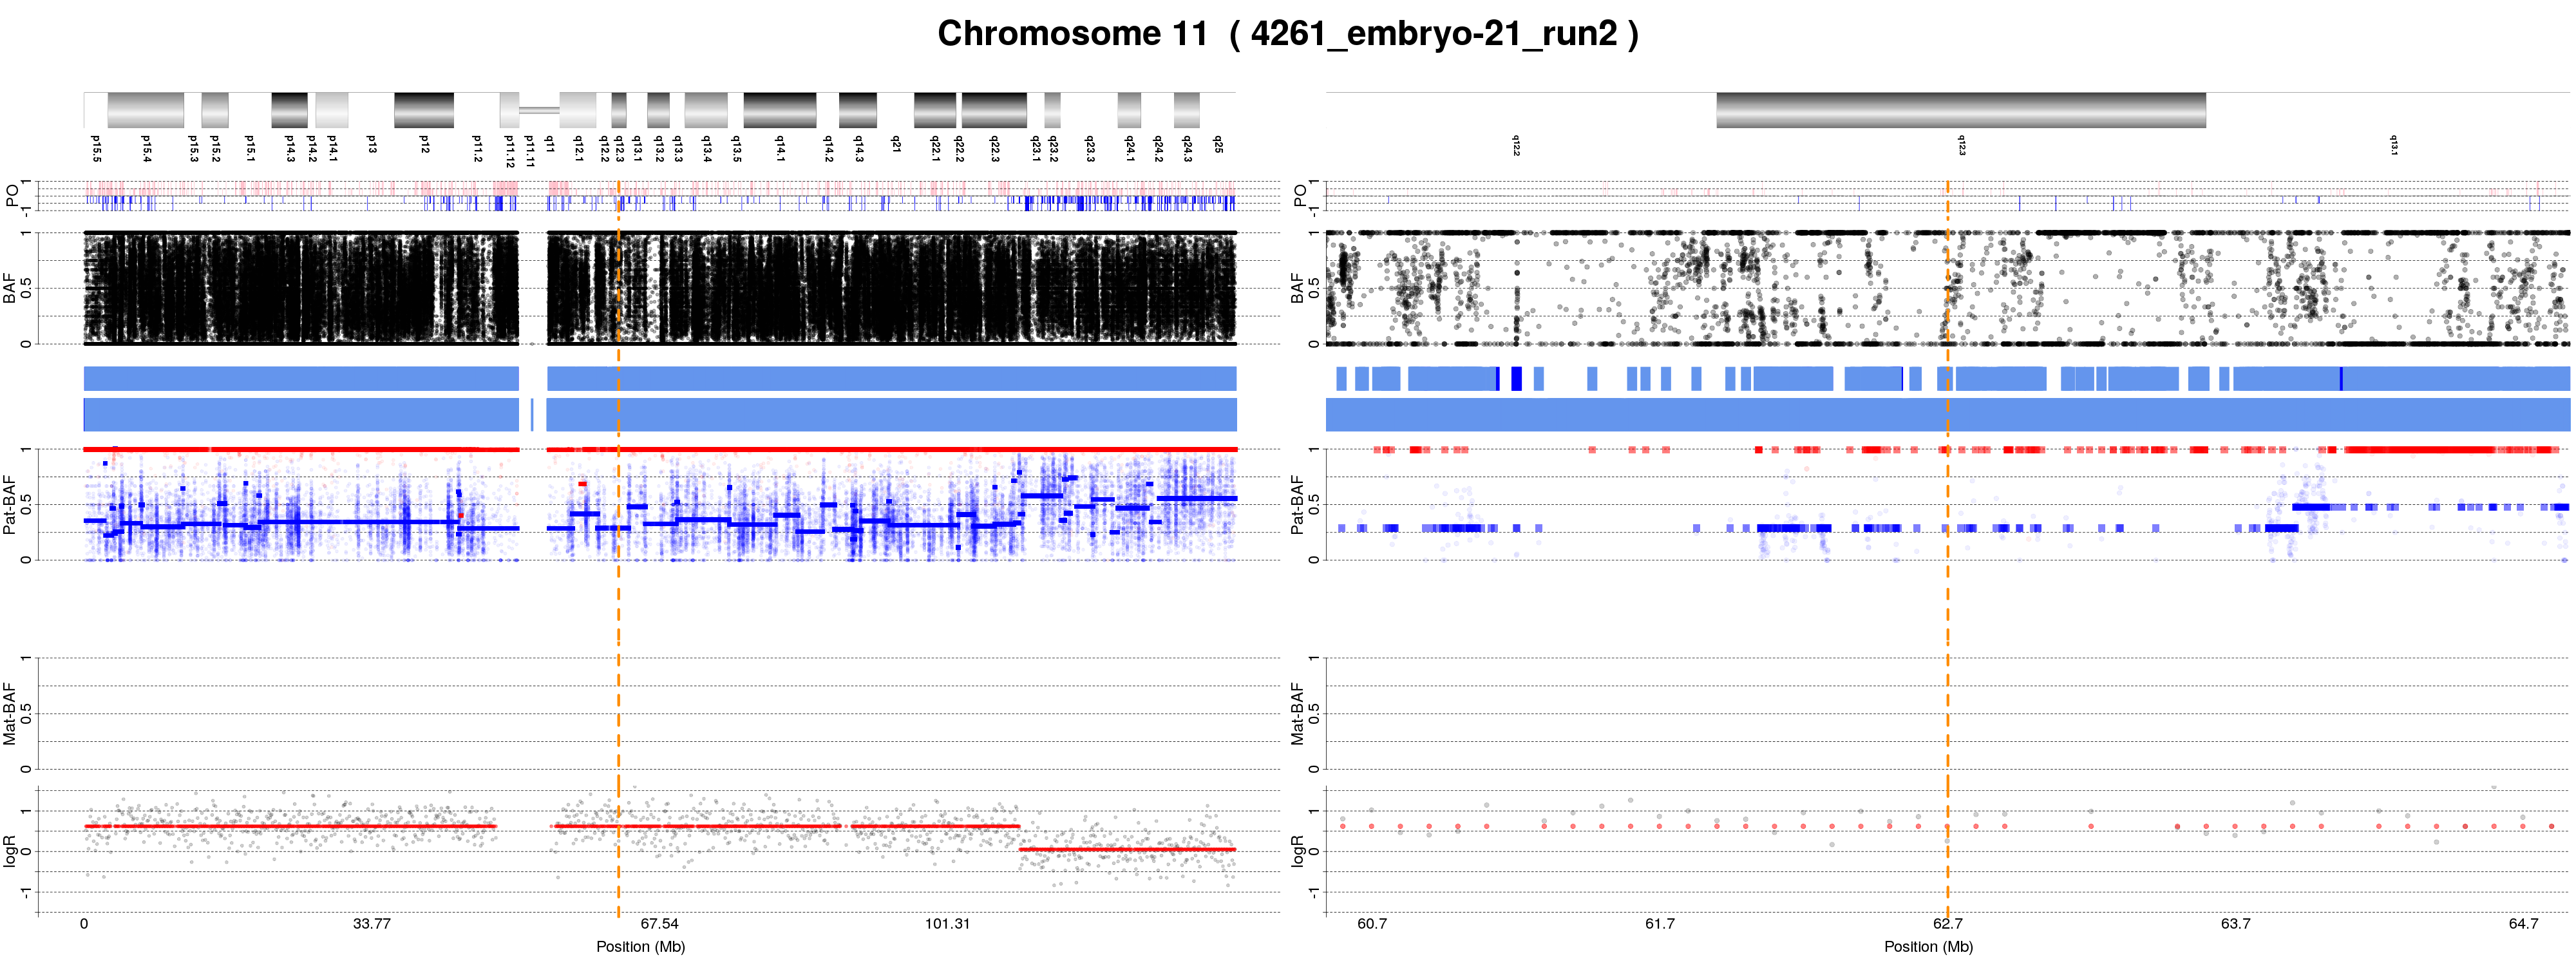

In [27]:
goal = "EmbryoTestReportPlot"
r_script = f"{script_path}/{goal}/{goal}.R"
arg0 = "4261_embryo-21_run2"
arg1 = "10"

cmd8 = f"{load_module} && {run_simg} {r_script} {config_file} {arg0} {arg1} {err_file}"
result = run(cmd8, capture_output=True, text=True, shell=True)
print(result.stdout)

# show the saved image
match = re.search(r'at\s+(.+?)/"?$', result.stdout)
path = match.group(1)
for img in glob.glob(f"{path}/*.png"):
    display(Image(img))

<br>
We also provide a single python script (haplarithmisis_pipeline.py) to wrap them together! 🌮 🎉 

```
python haplarithmisis_pipeline.py \
--run_simg "singularity exec /home/ping.cao/CGM/pgtR-1.0.simg Rscript" \
--goal MetaInfo \
--script_path "/home/ping.cao/CGM/Haplarithmisis/analyses" \
--config_file "/home/ping.cao/CGM/testfamily2/PGD4261/D21_14848-HMN5A_PGD/PGT_config_PGD4261.txt"
```